In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.metrics import plot_confusion_matrix

In [9]:
df = pd.read_csv("./DataSet/train.txt",delimiter=';',names=['text','label'])

In [10]:
print("Shape of the DataFrame:",df.shape)
df.head(5)

Shape of the DataFrame: (16000, 2)


,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


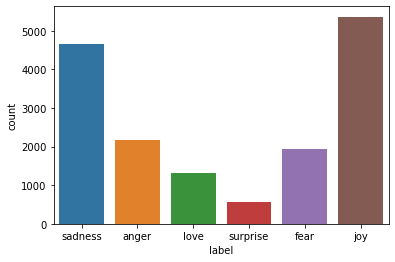

In [11]:
sns.countplot(
    data=df,
    x="label"
);

In [12]:
def make_seperation(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
    
make_seperation(df)

In [13]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

transformedWords = text_transformation(df['text'])

In [16]:
transformedWords

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(transformedWords)
X = traindata
y = df.label

In [ ]:
parameters = {
    'max_features': ('auto','sqrt'),
    'n_estimators': [500, 1000, 1500],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

In [18]:
parameters = {'n_estimators': [500],
             'max_depth': [None],
             'min_samples_split': [5],
             'min_samples_leaf': [5],
             'bootstrap': [True]}

In [19]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

In [21]:
rfc = RandomForestClassifier(
    max_features=grid_search.best_params_['max_features'],
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    bootstrap=grid_search.best_params_['bootstrap']
);

rfc.fit(X,y)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=500)

In [22]:
rfc = RandomForestClassifier(
    max_features='auto',
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    bootstrap=grid_search.best_params_['bootstrap']
);

rfc.fit(X,y)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=500)

In [26]:
test_df = pd.read_csv('./DataSet/test.txt',delimiter=';',names=['text','label'])

X_test, y_test = test_df.text,test_df.label

test_df = make_seperation(y_test)

test_transformedWords = text_transformation(X_test)

testdata = cv.transform(test_transformedWords)

In [27]:
predictions=rfc.predict(testdata)

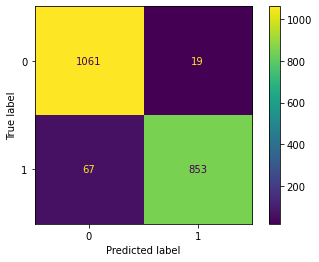

In [32]:
plot_confusion_matrix(
    estimator=rfc,
    X=testdata,
    y_true=y_test
)

In [33]:
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)

Accuracy_score:  0.957


In [34]:
pre_score = precision_score(y_test,predictions)
print('Precision_score: ',pre_score)

Precision_score:  0.9782110091743119


In [35]:
rec_score = recall_score(y_test,predictions)
print('Recall_score: ',rec_score)

Recall_score:  0.9271739130434783


In [36]:
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1080
           1       0.98      0.93      0.95       920

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [43]:
def sentiment_check(prediction_input):
    print(prediction_input)
    if prediction_input == 0:
        print("Negative Sentiment.")
    elif prediction_input == 1:
        print("Positive Sentiment.")
    else:
        print("Can't Analyze")

def analyze_sentiment(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    sentiment_check(prediction)

In [44]:
analyze_sentiment(['I am feeling helpless today.'])

[0]
Negative Sentiment.
